# REAME
- [sklearn.datasets.load_diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) で機械学習の一番の流れを実装する


In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

# 簡易EDA

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

df = pd.DataFrame(X, columns=diabetes.feature_names)
df['y'] = y

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
age    442 non-null float64
sex    442 non-null float64
bmi    442 non-null float64
bp     442 non-null float64
s1     442 non-null float64
s2     442 non-null float64
s3     442 non-null float64
s4     442 non-null float64
s5     442 non-null float64
s6     442 non-null float64
y      442 non-null float64
dtypes: float64(11)
memory usage: 38.1 KB


In [4]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


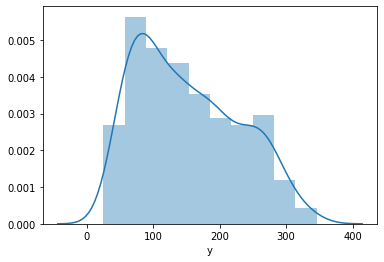

In [5]:
sns.distplot(df['y'])

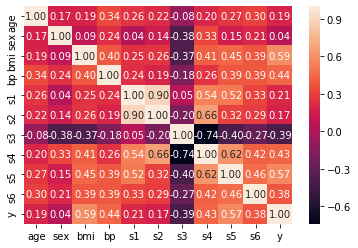

In [6]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [7]:
df.mean(),df.std()

(age   -3.634285e-16
 sex    1.308343e-16
 bmi   -8.045349e-16
 bp     1.281655e-16
 s1    -8.835316e-17
 s2     1.327024e-16
 s3    -4.574646e-16
 s4     3.777301e-16
 s5    -3.830854e-16
 s6    -3.412882e-16
 y      1.521335e+02
 dtype: float64, age     0.047619
 sex     0.047619
 bmi     0.047619
 bp      0.047619
 s1      0.047619
 s2      0.047619
 s3      0.047619
 s4      0.047619
 s5      0.047619
 s6      0.047619
 y      77.093005
 dtype: float64)

# 予測モデルの構築

In [8]:
from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(X,
                                                          y,
                                                          train_size=0.7,
                                                          random_state=0)

print(X_trainval.shape, X_test.shape)
print(y_trainval.shape, y_test.shape)

(309, 10) (133, 10)
(309,) (133,)


In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval,
                                                      y_trainval,
                                                      train_size=0.7,
                                                      random_state=0)

print(X_train.shape, X_valid.shape)
print(y_train.shape, y_valid.shape)

(216, 10) (93, 10)
(216,) (93,)


# 予測モデルの構築
- 評価指標はR2スコアを使ってみる

In [10]:
from sklearn.metrics import r2_score

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


r2_score(y_valid, lr.predict(X_valid))

0.5532060272330408

In [12]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)


r2_score(y_valid, ridge.predict(X_valid))

0.5595344440402215

# 最終モデルの作成と評価

In [13]:
final_model = Ridge(alpha=0.1)

final_model.fit(X_trainval, y_trainval)
r2_score(y_trainval, ridge.predict(X_trainval))

0.5430410812152162

In [14]:
r2_score(y_test, final_model.predict(X_test))

0.4021292749449723

おわり